# **High-Spender Customer Segmentation using Classification for MixITup Ice Cream**

## **Project Overview**
This project develops a data analysis system using classification methods to generate customer insights for MixITup Ice Cream. The system aims to support business decision-making by identifying customer segments, expanding market reach, and determining the most effective marketing strategies to attract and retain customers.

## **MixITup Ice Cream**

* MxITup adalah perusahaan rintisan yang dimotori para anak muda yang bergerak di bidang usaha Ice Cream, Boba Drinks, dan Desserts (snacks).
* Saat ini MixITup memiliki 3 cabang di Jakarta, Depok, dan Tangerang. MixITup mendapat respon positif di masyarakat, antrian dine-in dan pesan-antar produk MixITup melebihi kapasitas pelayanan.
* Rencananya MixITup ingin "scale" business-nya ke kota lain dan melakukan massive marketing.
* Melalui iming-iming diskon 5% untuk beberapa item di tokonya dan pembagian voucher promo diskon, MixITup berhasil mengumpulkan data pelanggan melalui kartu membernya (loyality program).
* Akan dilakukan proses pemberian informasi/insight dan saran/rekomendasi/strategi ke perusahaan via data.

## **Main Focus**

* How to scale our business?
* How to retain our customers?
* How to make customers' behavior to buy from us (make them stick to us).

**Variabel:**
- ID = ID customer, ditentukan lewat incremental value berdasarkan urutan kapan customer mendaftar loyality program
- Jenis Kelamin = Pria, Wanita
- Umur = Umur (dalam tahun)
- Pendapatan per-bulan = Pendapatan Customer dalam sebulan (Rupiah)
- Skor pengeluaran = Skor yang diberikan oleh MixITup untuk mengukur seberapa besar pengeluaran customer di MixITUp, Nilainya antara 0-100
- Menikah = Status pernikahan customer (0: Belum Menikah, 1: Menikah)
- Kota = Kota dimana customer menggunakan loyality programnya
- Promo = Seberapa sering customer menggunakan promonya: 0 (tidak pernah), 1 (jarang), 2 (sedang), 3 (sering)
- HariFav = Hari paling sering pelanggan menggunakan kartu loyality programnya.
- FavFlavor = Rasa Ice Cream yang paling sering dipilih customer
	0. Vanilla
	1. Strawberry
  2. Cookies N Cream
	3. Cokelat
	4. BlueBerry
	5. BubbleGum/Cotton Candy
	6. Coconut
	7. Caramel Pecan
	8. Mix Flavors

# **Modules**

In [2]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
--2026-02-22 08:31:49--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-02-22 08:31:49 ERROR 404: Not Found.



In [3]:
# Import Modules
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

# **Data Set**

In [4]:
# Import Data Set from GitHub
file_ = 'data/Customer.csv'
try: # Running Locally
    customer = pd.read_csv(file_, low_memory = False, encoding = 'utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/frianlh/DataMining-Project/main/data/Customer.csv
    customer = pd.read_csv(file_, low_memory = False, encoding = 'utf8')

--2026-02-22 08:32:51--  https://raw.githubusercontent.com/frianlh/DataMining-Project/main/data/Customer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10438 (10K) [text/plain]
Saving to: ‘data/Customer.csv’

Customer.csv        100%[===================>]  10.19K  --.-KB/s    in 0s      

2026-02-22 08:32:51 (20.1 MB/s) - ‘data/Customer.csv’ saved [10438/10438]



In [5]:
# Data Size
N, P = customer.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)

# Variable Type
print("Tipe Variabel df = ", type(customer))

# Show The First Five Data
customer.head()

baris =  200 , Kolom (jumlah variabel) =  10
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8


In [6]:
# Show The Last Five Data
customer.tail()

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0
199,300,Pria,50,"Rp1,639,344",14,1,Tangerang,3.0,Minggu,6


In [7]:
# Data Information
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    int64  
 3   Pendapatan per Bulan  200 non-null    object 
 4   Skor Pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


Note:
- Terdapat beberapa tipe data yang perlu diperbaiki, yaitu `Jenis Kelamin`, `Pendapatan per Bulan`, `Menikah`, `Kota`, `Promo`, `HariFav`, dan `FavFlavor`.
- `Jenis Kelamin` yang awalnya bertipe data object seharusnya bertipe data category.
- `Pendapatan per Bulan` yang awalnya bertipe data object seharusnya bertipe data integer.
- `Menikah` yang awalnya bertipe data object seharusnya bertipe data category.
- `Kota` yang awalnya bertipe data object seharusnya bertipe data category.
- `HariFav` yang awalnya bertipe data object seharusnya bertipe data category.
`FavFlavor` yang awalnya bertipe data integer seharusnya bertipe data category.

# **Pre Processing**

In [8]:
# Replace Symbol "-" with NaN
df = customer.replace("-", np.nan)
df.head(200)

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


In [9]:
# Formating Type Data Currency in Variabel Pendapatan per Bulan to Number
df['Pendapatan per Bulan'] = pd.to_numeric(df['Pendapatan per Bulan'].replace('[^0-9\.-]', '', regex = True))
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [10]:
# Type Data Correction
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         195 non-null    category
 2   Umur                  200 non-null    int64   
 3   Pendapatan per Bulan  200 non-null    int64   
 4   Skor Pengeluaran      200 non-null    int64   
 5   Menikah               187 non-null    category
 6   Kota                  200 non-null    category
 7   Promo                 194 non-null    category
 8   HariFav               200 non-null    category
 9   FavFlavor             200 non-null    category
dtypes: category(6), int64(4)
memory usage: 8.9 KB


Note: Tipe data sudah sesuai dengan yang seharusnya

In [11]:
# Duplicate Check Based On ID Customer
print(df['ID'].duplicated().sum())

# Show the Duplicate Data Based on ID Customer
df[df.duplicated(subset = ['ID'])]

0


,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


Note: Tidak terdapat duplicate values pada ID customer.

In [12]:
# Desciptive Statistics
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,200.0,NaN,NaN,NaN,200.5,57.879185,101.0,150.75,200.5,250.25,300.0
Jenis Kelamin,195,2,Wanita,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,200.0,NaN,NaN,NaN,37.355,11.992417,2.0,28.75,36.0,48.0,60.0
Pendapatan per Bulan,200.0,NaN,NaN,NaN,18672130.69,10764229.971006,0.0,10860655.0,19057377.0,25819672.0,50000000.0
Skor Pengeluaran,200.0,NaN,NaN,NaN,50.47,26.07101,1.0,34.75,50.0,73.0,101.0
Menikah,187,3,1,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,200,3,Jakarta,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,194.0,5.0,1.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,200,7,Senin,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,200.0,10.0,0.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note:
- Pada variabel `Jenis Kelamin` terdapat data yang missing. Hal ini dideteksi ketika melakukan screening data pada file format excel yang tersedia. Selanjutnya, data yang missing tersebut akan diasumsikan bahwa customer tersebut tidak berkenan untuk memberikan informasi terkait jenis kelaminnya. Namun, dalam analisis ini, data-data tersebut akan dikeluarkan.
- Pada variabel `Umur` terdapat customer yang berumur 2 tahun. Hal ini diasumsikan tidak mungkin terjadi karena secara logika, batita belum mampu mendaftarkan dirinya menjadi member di MixITup.
- Pada variabel `Penghasilan per Bulan` terdapat customer dengan penghasilan Rp0. Dalam hal ini, customer tersebut diasumsikan tidak berkenan untuk memberikan informasi nominal penghasilannya. Untuk selanjutnya, data ini akan diikutkan dalam analisis.
- Pada variabel `Skor Pengeluaran` terdapat skor yang melebihi 100, di mana pada data understanding diberikan informasi bahwa skor pengeluaran memiliki range 0-100. Dalam hal ini, data tersebut diasumsikan sebagai **noise**.
- Pada variabel `Menikah` terdapat 3 unique values. Pada analisis selanjutnya dilihat bahwa terdapat values yang bernilai ' ', '0', '1'. Selanjutnya, data yang missing tersebut akan diasumsikan bahwa customer tersebut tidak berkenan untuk memberikan informasi terkait status menikahnya. Namun, dalam analisis ini, data-data tersebut akan dikeluarkan.
- Pada variabel `Kota` terdapat nama kota yang terdeteksi typo, yaitu 'JJakarta'. Hal ini sudah dibetulkan menjadi 'Jakarta' sebelum data ini diimport ke dalam Google Colab.
- Pada variabel `Promo` terdapat 5 unique values yang mana pada data understanding diberikan informasi bahwa promo terdiri dari 4 kategori, yaitu 0, 1, 2, 3. Namun, pada analisis selanjutnya, dilihat bahwa terdapat values, yaitu 5. Dalam hal ini values tersebut diasumsikan sebagai **noise**.
- Pada variabel `FavFlavor` terdapat 10 unique values yang mana pada data understanding diberikan informasi bahwa jenis favorite flavor terdiri dari 0, 1, 2, 3, 4, 5, 6, 7, 8.  Namun, pada analisis selanjutnya, dilihat bahwa terdapat values, yaitu 9. Solusi untuk menangani masalah akan dijelaskan lebih lanjut pada section selanjutnya.


In [13]:
# Unique values pada Variabel Menikah
df['Menikah'].dtypes

CategoricalDtype(categories=[' ', '0', '1'], ordered=False, categories_dtype=object)

In [14]:
# Unique values pada Variabel Promo
df['Promo'].dtypes

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 5.0], ordered=False, categories_dtype=float64)

In [15]:
# Unique values pada Variabel FavFlavor
df['FavFlavor'].dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=False, categories_dtype=int64)

Variabel dengan Tipe Data Integer

In [16]:
# Variable Selection
df_num = df.select_dtypes(include = 'int64')
df_num.head()

,ID,Umur,Pendapatan per Bulan,Skor Pengeluaran
0,101,49,13114754,52
1,102,32,33606557,86
2,103,51,15983606,41
3,104,19,12704918,55
4,105,38,20081967,42


Variabel dengan Tipe Data Kategorik

In [17]:
df_kat = df.select_dtypes(include = 'category')
df_kat

,Jenis Kelamin,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,1,Jakarta,1.0,Sabtu,2
1,Wanita,1,Depok,1.0,Minggu,6
2,Pria,1,Jakarta,2.0,Minggu,3
3,Pria,0,Jakarta,1.0,Rabu,7
4,Wanita,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...
195,Pria,1,Depok,1.0,Senin,0
196,Pria,1,Jakarta,1.0,Minggu,5
197,Wanita,1,Depok,1.0,Senin,7
198,Wanita,1,Depok,0.0,Selasa,0


### Detecting and Handling Noise

#### Variabel Pengeluaran

In [18]:
# Noise at Variable Skor Pengeluaran
df[df['Skor Pengeluaran'] == 101]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
126,227,Wanita,47,18442622,101,NaN,Jakarta,2.0,Minggu,7


In [19]:
# Drop Row With Index
df.drop([126], axis = 0, inplace = True)
df.shape

(199, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa terdapat value 101 pada variabel `skor pengeluaran` dan data tersebut diasumsikan sebagai noise. Dalam hal ini akan dihandle dengan mengeluarkan data tersebut dari data yang akan dianalisis.

#### Variabel Umur

In [20]:
# Noise at Variable Umur = 2 Tahun & Pendapatan per Bulan > 18 juta rupiah
df[df['Umur'] == 2]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,220,Pria,2,18032786,41,0,Jakarta,2.0,Senin,0


In [21]:
# Drop Row With Index 119
df.drop([119], axis = 0, inplace = True)
df.shape

(198, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa terdapat value 2 pada variabel `umur` dan data tersebut diasumsikan sebagai noise. Dalam hal ini akan dihandle juga dengan mengeluarkan data tersebut dari data yang akan dianalisis.

#### Variabel FavFlavor

In [22]:
# Noise at Variable FavFlavor = 9
df[df['FavFlavor'] == 9]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,231,Wanita,44,25819672,20,1,Tangerang,3.0,Sabtu,9


In [23]:
# Drop Row With Index 130
df.drop([130], axis = 0, inplace = True)
df.shape

(197, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa terdapat value 9 pada variabel `FavFlavor` dan data tersebut diasumsikan sebagai noise karena tidak terdapat dalam data understanding dan hanya terdapat 1 customer dengan FavFlavor=9. Dalam hal ini akan dihandle juga dengan mengeluarkan data tersebut dari data yang akan dianalisis.

#### Variabel Promo

In [24]:
# Noise at Variable Promo = 5
df[df['Promo'] == 5]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
14,115,Wanita,58,2049180,15,1,Tangerang,5.0,Sabtu,8


In [25]:
# Drop Row With Index 14
df.drop([14], axis = 0, inplace = True)
df.shape

(196, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa terdapat value 5 pada variabel `Promo` dan data tersebut diasumsikan sebagai noise karena tidak terdapat dalam data understanding dan hanya terdapat 1 customer dengan Promo=5. Dalam hal ini akan dihandle juga dengan mengeluarkan data tersebut dari data yang akan dianalisis.

### Missing Values

In [26]:
df_new = df.copy()

In [27]:
# Get Total Missing Values
print(df_new.isnull().sum())

ID                       0
Jenis Kelamin            5
Umur                     0
Pendapatan per Bulan     0
Skor Pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64


In [28]:
# Drop Missing Values
df_new = df_new.dropna()

In [29]:
# Get Data Dimension
df_new.shape

(173, 10)

Note:
- Sesuai dengan penjelasan sebelumnya, terdapat 5 missing values pada `Jenis Kelamin`, 12 missing values pada `Menikah`, dan 6 missing values pada `Promo`.
- Dalam hal ini missing values tersebut akan dihandle dengan dropping rows pada data-data yang missing tersebut. Hal ini dilakukan karena jika dilakukan imputasi pada data memiliki kemungkinan untuk memberikan interpretasi yang salah dalam analisis customer segmentation selanjutnya. Maka dari itu, missing data tersebut akan dikeluarkan dari analisis.

# **Exploratory Data Analysis**

## Detecting Outliers

### Variabel Umur

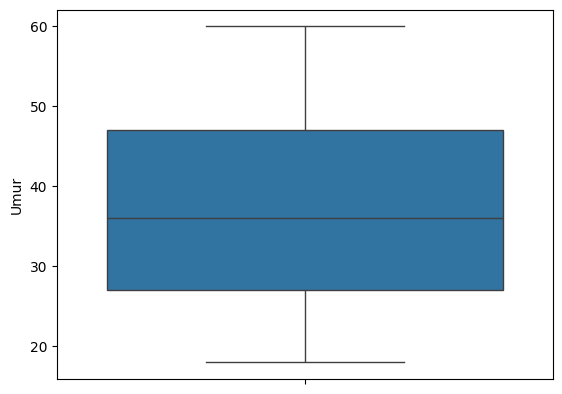

In [30]:
# Umur Distribution
p = sns.boxplot(data = df_new['Umur'])

Note: Tidak terdapat deteksi outlier pada variabel `Umur`.

### Variabel Pendapatan per Bulan

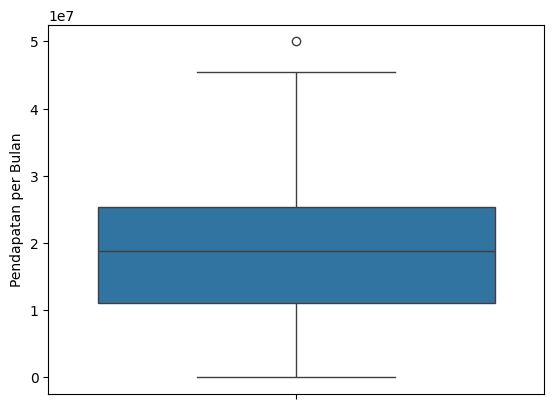

In [31]:
p = sns.boxplot(data = df_new['Pendapatan per Bulan'])

In [32]:
df_new.shape

(173, 10)

In [33]:
def check_outlier(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1

  new_column = []

  for x in data[column]:
    if x < q1 - 1.5 * iqr:
      new_column.append('outlier')
    elif x > q3 + 1.5 * iqr:
      new_column.append('outlier')
    else:
      new_column.append('non-outlier')

  return new_column

In [34]:
df_new['outlier_pendapatan'] = check_outlier(data=df_new, column='Pendapatan per Bulan')

In [35]:
df_new[df_new['outlier_pendapatan'] == 'outlier']

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,outlier_pendapatan
66,167,Pria,30,50000000,83,1,Depok,1.0,Sabtu,3,outlier


<Axes: xlabel='Pendapatan per Bulan', ylabel='Count'>

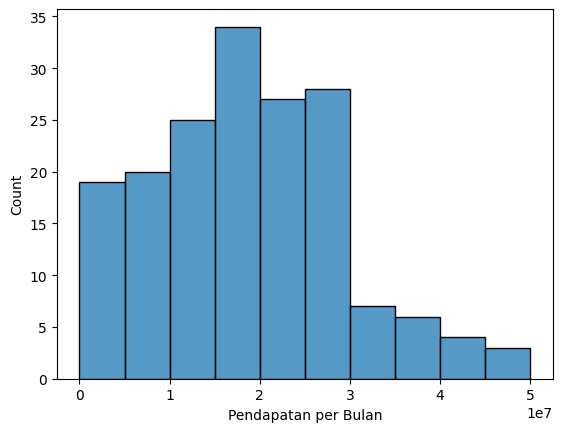

In [36]:
sns.histplot(data = df_new['Pendapatan per Bulan'])

Note:
- Terdapat 1 data outlier pada variabel penghasilan di mana customer tersebut memiliki pendapat per bulan sebesar Rp50.000.000.
- Jika dianalisis lebih lanjut, customer tersebut memiliki pendapatan yang tinggi dengan skor pengeluaran yang tinggi, namun masuk ke dalam kategori jarang menggunakan promo.
- Hal ini dapat menjadi **catatan bagi perusahaan** bahwa customer tersebut berpotensi untuk menjadi customer yang loyal bagi perusahaan karena customer tersebut memberikan pendapatan yang tinggi bagi perusahaan tanpa menggunakan promo.
- Namun, dalam analisis ini outlier tersebut akan dikeluarkan karena jika dilihat dari plot distribusi, distribusi variabel `Penghasilan per Bulan` cenderung skewed.

In [37]:
# Remove Outlier
df_final = df_new[df_new['outlier_pendapatan'] == 'non-outlier']

In [38]:
df_final.drop(['outlier_pendapatan'], axis = 1, inplace = True)

In [39]:
df_final.shape

(172, 10)

<Axes: xlabel='Pendapatan per Bulan', ylabel='Count'>

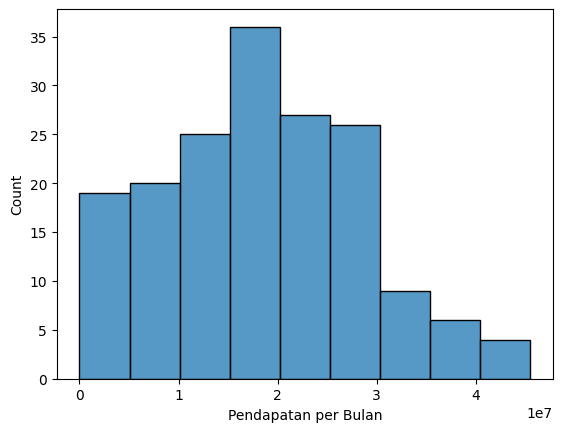

In [40]:
sns.histplot(data = df_final['Pendapatan per Bulan'])

Note: Setelah outlier dikeluarkan dari data, maka distribusi pada variabel `Pendapatan per Bulan` cenderung lebih normal daripada sebelum outlier dikeluarkan.

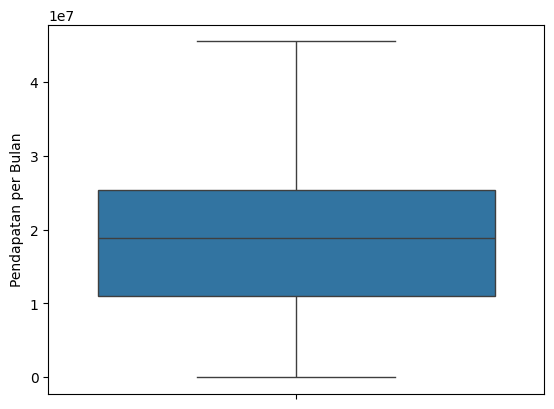

In [41]:
# Boxplot Variable Pendapatan per Bulan setelah Outlier dikeluarkan
p = sns.boxplot(data = df_final['Pendapatan per Bulan'])

### Variabel Skor Pengeluaran

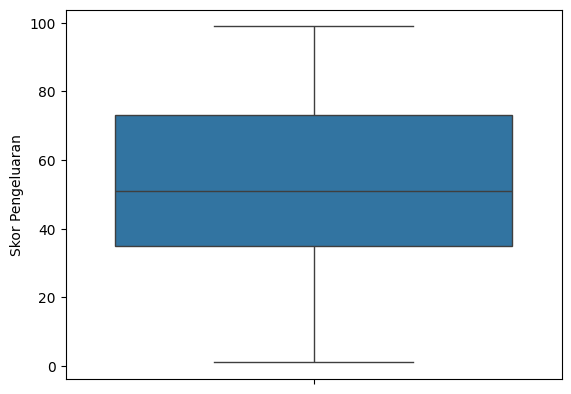

In [42]:
p = sns.boxplot(data = df_new['Skor Pengeluaran'])

Note: Tidak terdapat deteksi outlier pada variabel `Skor Pengeluaran`.

## **Rekomendasi**

### **Case 1**

In [43]:
# Count Data by Variable Kota
kota_count  = df_final['Kota'].value_counts()
kota_count

,count
Kota,
Jakarta,76
Depok,53
Tangerang,43


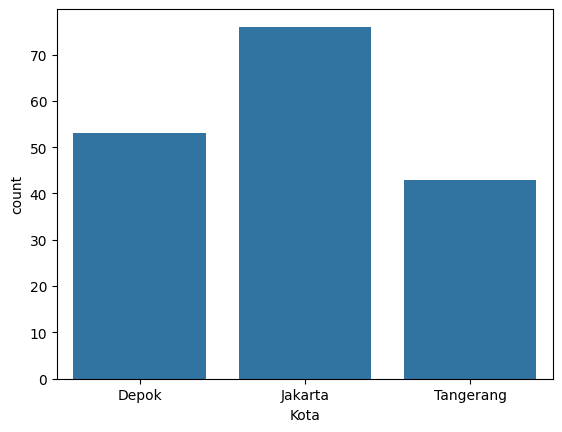

In [44]:
p = sns.countplot(x = 'Kota', data = df_final)

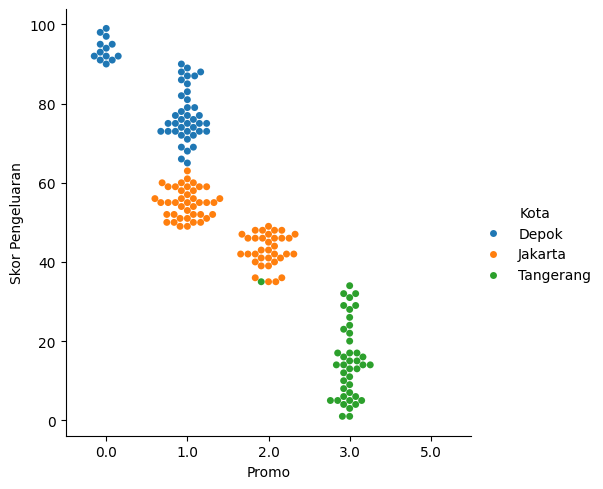

In [45]:
p = sns.catplot(x = 'Promo', y = 'Skor Pengeluaran', hue = 'Kota', kind = 'swarm', data = df_final)

Berdasarkan data, kota Jakarta merupakan kota dengan member terbanyak, yakni 77 customers. Kemudian setelah melihat penggunaan promo yang dilakukan oleh para customers dari masing-masing kuota, diketahui bahwa para member atau customers yang berada di kota Jakarta cukup interaktif dalam memanfaatkan promo yang ditawarkan oleh MixITup. Oleh karena itu, kota Jakarta memiliki potensi yang cukup baik untuk membuka cabang baru dikarenakan jumlah customers yang tinggi serta tingkat penggunaan promo yang baik dari para member. Selain itu, terlihat juga bahwa customer di Kota Tangerang sangat sering menggunakan promo. Harapannya, dengan memanfaatkan jumlah member atau customers yang tinggi serta keaktifan para member dalam menggunakan promo, bisa mendatangkan customer baru saat membuka cabang baru di Jakarta dengan word-of-mouth marketing.

### **Case 2**

Akan dilakukan analisis terkait jumlah man-power yang perlu disediakan oleh MixITup dengan mempertimbangkan variabel ‘HariFav’ dari para members. Variabel ‘HariFav’ dapat menjadi data yang merepresentasikan tingkat keramaian dari MixITup pada masing-masing harinya.

In [46]:
# Count Data by Variable HariFav
hari_count  = df_final['HariFav'].value_counts()
hari_count

,count
HariFav,
Senin,61
Sabtu,47
Minggu,31
Selasa,19
Kamis,6
Rabu,5
Jumat,3


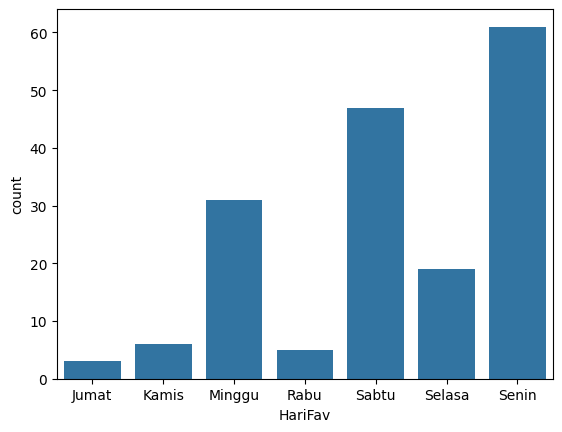

In [47]:
p = sns.countplot(x = 'HariFav', data = df_final)

Berdasarkan data, terlihat bahwa hari favorit dari sebagian besar member MixITup adalah Senin, Sabtu, dan Minggu, respectively. Oleh karena itu, MixITup perlu meningkatkan pelayanan dengan menambah jumlah pelayan (meningkatkan man-power) pada ketiga hari tersebut serta meningkatkan stock barang, dalam kasus ini ice cream, yang dijual.
Kemudian terlihat bahwa para member MixITup kurang mem-favoritkan hari Jumat dan Rabu. Oleh karena itu, jumlah pelayan dan stock barang pada hari Jumat dan Rabu dapat dikurangkan dan dialokasikan ke hari-hari lainnya, terutama Senin, Sabtu, dan Minggu.

Dengan melakukan hal-hal di atas, MixITup dapat mengoptimalkan man-power dan alokasi operational cost hariannya sesuai dengan kebutuhan dan dapat memaksimalkan profit yang diperoleh.

## **Case 3**

Selanjutnya, akan dilakukan analisis guna merencanakan massive marketing yang dapat dilakukan oleh MixITup. Marketing ini tidak hanya untuk menarik customers baru untuk cabang baru dari MixITup tapi juga cabang-cabang lama lainnya. Massive marketing yang akan dilakukan adalah dengan pemberian promo. Pemberian promo pada umumnya dilakukan untuk 3 menargetkan 3 tipe customers, yakni:
- Memikat customers baru yang dapat dikonversikan sebagai member.
- Mempertahankan para customers yang telah menjadi member dan sudah sering membeli produk-produk MixITup (retained customers).
- Memikat para customers yang telah menjadi member, namun belum cukup sering membeli produk-produk MixITup dan membuatnya menjadi lebih sering membeli (less-retained customers).


Pertama-tama akan dilakukan analisis untuk menentukan skema promo yang akan ditawarkan MixITup kepada para customersnya dengan upaya untuk meningkatkan jumlah pembelian, terutama untuk produk (rasa) ice cream yang kurang diminati para member.

In [48]:
# Count Data by Variable FavFlavor
flavor_count  = df_final['FavFlavor'].value_counts()
flavor_count

,count
FavFlavor,
0,35
1,19
4,19
8,18
5,17
3,17
7,17
2,16
6,14


<Axes: xlabel='HariFav'>

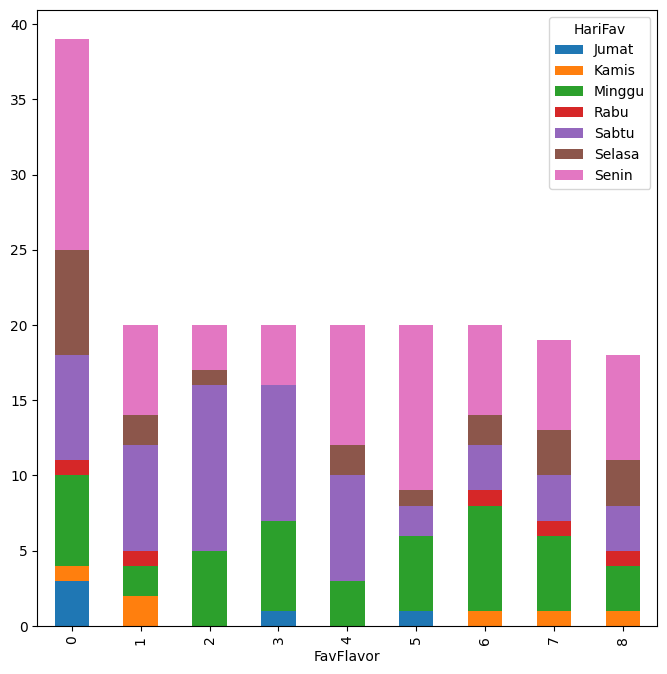

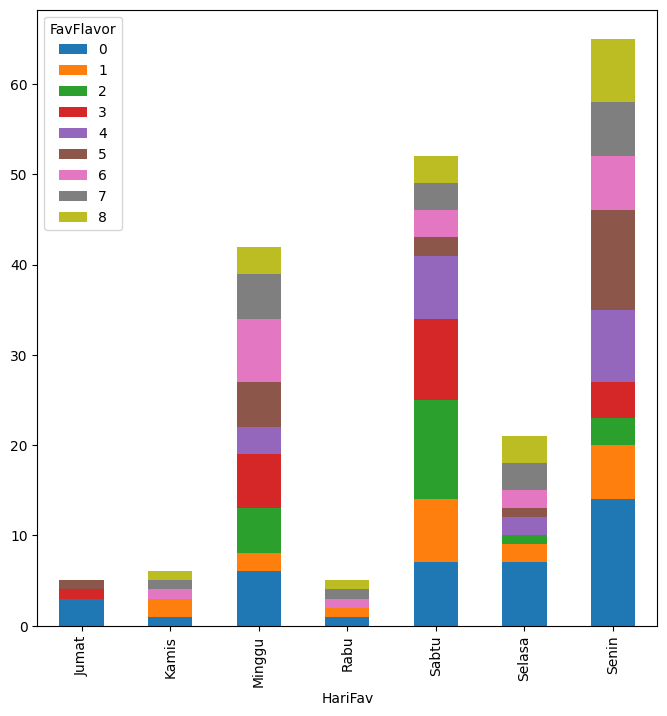

In [49]:
CT=pd.crosstab(index=df["FavFlavor"], columns=df["HariFav"])
CT.plot(kind="bar", figsize=(8,8), stacked=True)

CT=pd.crosstab(index=df["HariFav"], columns=df["FavFlavor"])
CT.plot(kind="bar", figsize=(8,8), stacked=True)

Berdasarkan data, terlihat bahwa rasa Vanilla merupakan rasa yang paling diminati oleh para member dan rasa lainnya kurang diminati. Oleh karena itu, demi meningkatkan jumlah penjualan dari rasa lainnya yang kurang diminati tersebut, MixITup dapat membuat skema promo atau pemaketan produk sebagai berikut.
- Rabu dan Kamis: cookies n cream, cokelat, blueberry, dan bubble gum.
- Jumat:  Vanilla, cookies n cream, cokelat, blueberry, coconut, caramel pecan, dan mix flavors. Alasan pemilihan rasa tersebut karena tidak ada pembelian rasa tersebut pada hari yang dimaksud.
- Senin: Vanilla, cookies n cream, coklat. Seperti, beli vanilla gratis cookies n cream atau coklat. Karena vanilla banyak dibeli, sedangkan cookies n cream dan coklat sedikit peminat.
- Selasa: Vanilla + bubblegum atau cookies n cream. Karena vanilla banyak dibeli, sedangkan cookies n cream dan bubblegum sedikit peminat.
- Sabtu: Cookies n cream + bubblegum atau caramel pecan. Karena cookies n cream banyak dibeli, sedangkan bubble gum dan caramel pecan sedikit peminat.
- Minggu: Vanilla + blueberry atau strawberry. Karena vanilla banyak dibeli, sedangkan blueberry dan strawberry sedikit peminat.

Semua paket tersebut hanya dapat dibeli oleh para customers yang telah mendaftarkan diri sebagai member (dengan tujuan meningkatkan jumlah membership, menargetkan para customers baru) dan memberikan penghematan kepada para member sebesar 15-20% dari harga normal (dengan tujuan mempertahankan dan meningkatkan jumlah pembelian para member, menargetkan retained customers dan less-retained customers).

# **Regression**

Akan dilakukan regresi untuk melihat pengaruh variabel lain terhadap variabel Skor Pengeluaran.

In [50]:
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [51]:
df = df.drop(columns=['ID'])

In [52]:
df.head()

,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [53]:
import statsmodels.formula.api as smf

In [54]:
df = df.rename(columns={
    'Skor Pengeluaran': 'Skor_Pengeluaran',
    'Jenis Kelamin': 'Jenis_Kelamin',
    'Pendapatan per Bulan': 'Pendapatan_per_Bulan'
})

In [55]:
model_multiple = smf.ols("Skor_Pengeluaran ~ Jenis_Kelamin + Umur + Pendapatan_per_Bulan + Menikah + Kota + Promo + HariFav + FavFlavor",data=df).fit()

In [56]:
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:       Skor_Pengeluaran   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     116.2
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           3.32e-83
Time:                        08:32:59   Log-Likelihood:                -554.04
No. Observations:                 173   AIC:                             1156.
Df Residuals:                     149   BIC:                             1232.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Diperoleh nilai R-square yang cukup tinggi, yaitu 0,947. Hal ini menunjukkan bahwa **94,7% variasi variabel Skor Pengeluaran dapat dijelaskan oleh variabel independen**, sisanya adalah oleh faktor lain di luar data yang dianalisis. Angka ini dapat dikatakan cukup tinggi, tetapi akan dicek apakah data memenuhi syarat untuk melakukan analisis regresi.

## **Residual Analysis**

In [57]:
residual_multiple = df["Skor_Pengeluaran"] - model_multiple.predict(df[["Jenis_Kelamin","Umur","Pendapatan_per_Bulan","Menikah","Kota","Promo","HariFav","FavFlavor"]])

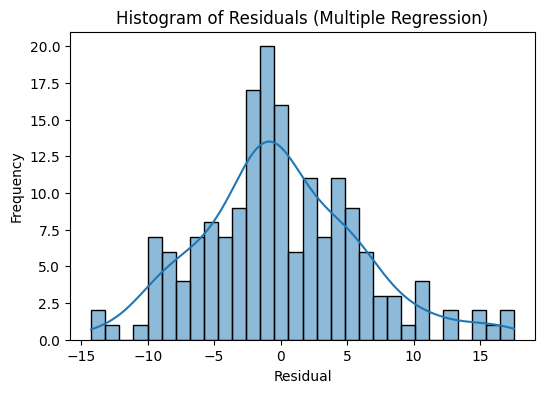

In [58]:
# Plot 1: Histogram residual
plt.figure(figsize=(6, 4))
sns.histplot(residual_multiple, kde=True, bins=30)
plt.title("Histogram of Residuals (Multiple Regression)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

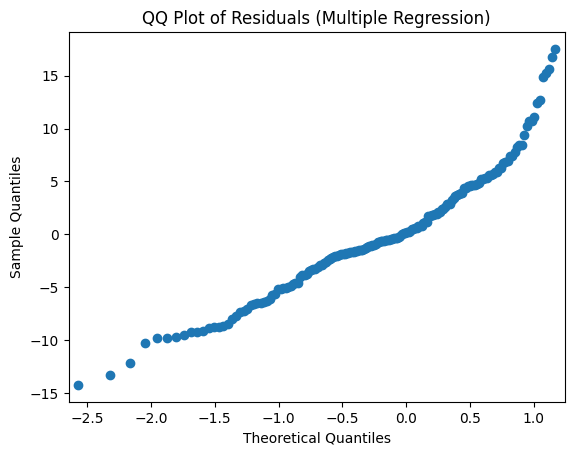

In [60]:
# Plot 2: QQ Plot
sm.qqplot(residual_multiple, line='s')
plt.title("QQ Plot of Residuals (Multiple Regression)")
plt.show()

Interpretasi:
Mayoritas titik berada di diagonal sehingga asumsi normalitas residual cukup terpenuhi.

In [61]:
residual_multiple2 = model_multiple.resid

from scipy import stats

residual_std = (residual_multiple2 - residual_multiple2.mean()) / residual_multiple2.std()

ks_stat, p_value = stats.kstest(residual_std, 'norm')

print("KS Statistic:", ks_stat)
print("p-value:", p_value)


KS Statistic: 0.06929190579280586
p-value: 0.3606421019942736


Terlihat bahwa 𝑝−𝑣𝑎𝑙𝑢𝑒>𝛼 sehingga terdapat cukup bukti untuk mengatakan 𝐻0 tidak ditolak, artinya residual dari model yang digunakan memiliki distribusi normal.

## **Multicolinearity**

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # Library yang membantu untuk melihat multikolinearitas
import pandas as pd

In [63]:
# ambil matrix X dari model
X_vif = model_multiple.model.exog
vif_df = pd.DataFrame()
vif_df["Variable"] = model_multiple.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_vif, i)
                 for i in range(X_vif.shape[1])]

print(vif_df)

                   Variable        VIF
0                 Intercept   0.000000
1   Jenis_Kelamin[T.Wanita]   1.152842
2              Menikah[T.0]        inf
3              Menikah[T.1]        inf
4           Kota[T.Jakarta]   2.779160
5         Kota[T.Tangerang]  40.916458
6              Promo[T.1.0]   6.554106
7              Promo[T.2.0]   6.031423
8              Promo[T.3.0]  44.877708
9              Promo[T.5.0]        NaN
10         HariFav[T.Kamis]   3.246754
11        HariFav[T.Minggu]  10.728336
12          HariFav[T.Rabu]   2.803531
13         HariFav[T.Sabtu]  14.026067
14        HariFav[T.Selasa]   7.009539
15         HariFav[T.Senin]  14.848458
16           FavFlavor[T.1]   1.750367
17           FavFlavor[T.2]   1.751351
18           FavFlavor[T.3]   1.765662
19           FavFlavor[T.4]   1.781192
20           FavFlavor[T.5]   1.705939
21           FavFlavor[T.6]   1.560883
22           FavFlavor[T.7]   1.840611
23           FavFlavor[T.8]   1.723393
24           FavFlavor[T.

Interpretasi:
Terdapat beberapa variabel dengan VIF>10 yang menunjukkan bahwa variabel tersebut mengalami multikoliniearitas

## **QQ Plot Analysis**

In [64]:
# Plot 3: Residual vs Fitted
fitted_multiple = model_multiple.fittedvalues

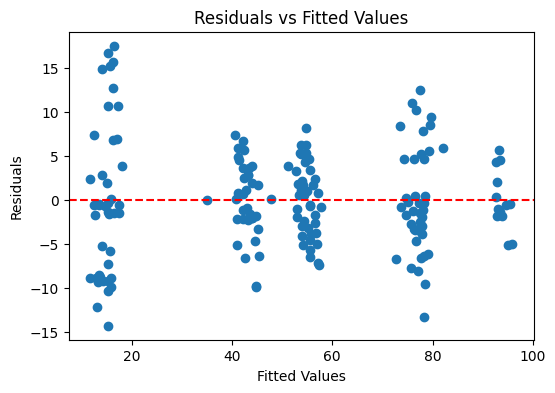

In [65]:
fitted_multiple = model_multiple.fittedvalues
residual_multiple = model_multiple.resid

plt.figure(figsize=(6,4))
plt.scatter(fitted_multiple, residual_multiple)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

Interpretasi:

  - Titik-titik tidak menyebar acak dan membentuk pola jelas, yang berarti:

    - Linearitas tidak terpenuhi.

    - Homoskedastisitas (ragam residual konstan) juga tidak terpenuhi.

**Final Interpretation:**
Karena terdapat beberapa syarat yang tidak terpenuhi, maka akan dicoba beberapa metode klasifikasi.

# **Classification**

In [66]:
# Import Additional Libraries for Preprocessing
import numpy as np
import pandas as pd

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Try import category encoders
try:
    import category_encoders as ce
    BINARY_ENCODING_AVAILABLE = True
    print("Category encoders available - Binary encoding enabled")
except ImportError:
    BINARY_ENCODING_AVAILABLE = False
    print("Category encoders not available - Using fallback encoding")

# Dataset info
print(f"\nDataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Category encoders not available - Using fallback encoding

Dataset shape: (196, 9)
Memory usage: 0.01 MB


## **Target Creation (feature engineering)**

Target akan dijadikan Binary, dengan pengelompokan skor pengeluaran > Q3 dan sebaliknya.

In [68]:
# CREATE TARGET (HIGH vs LOW SPENDER)
target_column = 'High_Spender'

q3_value = df['Skor_Pengeluaran'].quantile(0.75)
df[target_column] = (df['Skor_Pengeluaran'] >= q3_value).astype(int)

print(f"Q3 Skor Pengeluaran: {q3_value}")
print(df[target_column].value_counts())

Q3 Skor Pengeluaran: 73.0
High_Spender
0    145
1     51
Name: count, dtype: int64


In [69]:
# Target and Features Separation
X = df.drop(columns=[target_column, 'Skor_Pengeluaran'])
y = df[target_column]

print(f"Target: {target_column}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

print(f"\nTarget distribution:")
print(y.value_counts())

print(f"\nTarget proportion:")
print(y.value_counts(normalize=True).round(3))

Target: High_Spender
Features shape: (196, 8)
Target shape: (196,)

Target distribution:
High_Spender
0    145
1     51
Name: count, dtype: int64

Target proportion:
High_Spender
0    0.74
1    0.26
Name: proportion, dtype: float64


## **Feature Analysis and Categorization**

In [70]:
print(X.dtypes)

Jenis_Kelamin           category
Umur                       int64
Pendapatan_per_Bulan       int64
Menikah                 category
Kota                    category
Promo                   category
HariFav                 category
FavFlavor               category
dtype: object


In [71]:
X

,Jenis_Kelamin,Umur,Pendapatan_per_Bulan,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,1,Depok,1.0,Senin,0
196,Pria,57,15983606,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786,1,Depok,1.0,Senin,7
198,Wanita,23,1229508,1,Depok,0.0,Selasa,0


In [72]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

print(f"Numerical features ({len(numerical_features)}):")
print(numerical_features)

print(f"\nCategorical features ({len(categorical_features)}):")

low_cardinality_features = []
high_cardinality_features = []

cardinality_info = []

for col in categorical_features:
    unique_count = X[col].nunique()
    sample_values = X[col].unique()[:3].tolist()

    if unique_count <= 10:
        low_cardinality_features.append(col)
        category = "Low"
    else:
        high_cardinality_features.append(col)
        category = "High"

    cardinality_info.append({
        'feature': col,
        'unique_count': unique_count,
        'category': category,
        'sample': sample_values
    })

    print(f"  {col}: {unique_count} unique ({category}) - {sample_values}")

print(f"\nENCODING STRATEGY:")
print(f"  Low cardinality ({len(low_cardinality_features)}): OneHot Encoding")
print(f"  High cardinality ({len(high_cardinality_features)}): {'Binary' if BINARY_ENCODING_AVAILABLE else 'Ordinal'} Encoding")

Numerical features (2):
['Umur', 'Pendapatan_per_Bulan']

Categorical features (6):
  Jenis_Kelamin: 2 unique (Low) - ['Wanita', 'Pria', nan]
  Menikah: 3 unique (Low) - ['1', '0', nan]
  Kota: 3 unique (Low) - ['Jakarta', 'Depok', 'Tangerang']
  Promo: 4 unique (Low) - [1.0, 2.0, 0.0]
  HariFav: 7 unique (Low) - ['Sabtu', 'Minggu', 'Rabu']
  FavFlavor: 9 unique (Low) - [2, 6, 3]

ENCODING STRATEGY:
  Low cardinality (6): OneHot Encoding
  High cardinality (0): Ordinal Encoding


## **Build Preprocessing Pipeline**

In [73]:
# CELL 5 : Build Preprocessing Pipeline
print("BUILDING PREPROCESSING PIPELINE")
print("="*50)

# 1. Numerical Pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])
print("Numerical Pipeline: Imputer(median) + RobustScaler")

# 2. Low Cardinality Categorical Pipeline
low_cardinality_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])
print("Low Cardinality Pipeline: Imputer(mode) + OneHotEncoder")

# 3. High Cardinality Categorical Pipeline
if BINARY_ENCODING_AVAILABLE and high_cardinality_features:
    high_cardinality_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('binary_encoder', ce.BinaryEncoder(drop_invariant=True, return_df=False))
    ])
    print("High Cardinality Pipeline: Imputer(mode) + BinaryEncoder")
else:
    high_cardinality_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])
    print("High Cardinality Pipeline: Imputer(mode) + OrdinalEncoder (fallback)")

# Combine transformers
transformers = [
    ('num', numerical_pipeline, numerical_features),
    ('low_cat', low_cardinality_pipeline, low_cardinality_features)
]

if high_cardinality_features:
    transformers.append(('high_cat', high_cardinality_pipeline, high_cardinality_features))

# Main preprocessor
preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='drop',
    sparse_threshold=0
)

print(f"\n🔧 PIPELINE SUMMARY:")
print(f"  Numerical: {len(numerical_features)} features → RobustScaler")
print(f"  Low categorical: {len(low_cardinality_features)} features → OneHot")
print(f"  High categorical: {len(high_cardinality_features)} features → {'Binary' if BINARY_ENCODING_AVAILABLE else 'Ordinal'}")

BUILDING PREPROCESSING PIPELINE
Numerical Pipeline: Imputer(median) + RobustScaler
Low Cardinality Pipeline: Imputer(mode) + OneHotEncoder
High Cardinality Pipeline: Imputer(mode) + OrdinalEncoder (fallback)

🔧 PIPELINE SUMMARY:
  Numerical: 2 features → RobustScaler
  Low categorical: 6 features → OneHot
  High categorical: 0 features → Ordinal


## **Train Test Split**

In [74]:
print("TRAIN-TEST SPLIT")
print("="*25)

from sklearn.model_selection import train_test_split

# Feature & target
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Data split completed!")


TRAIN-TEST SPLIT
Training set: (156, 9)
Test set: (40, 9)
Data split completed!


## **Apply Preprocessing**

In [75]:
print("APPLYING PREPROCESSING PIPELINE")
print("="*40)

print("Fitting preprocessor on training data...")

# Fit di TRAIN saja (anti leakage)
X_train_processed = preprocessor.fit_transform(X_train)

print("Transforming test data...")
X_test_processed = preprocessor.transform(X_test)

print("\nFINAL DATA FOR MODELING:")
print(f"  X_train_processed: {X_train_processed.shape}")
print(f"  X_test_processed: {X_test_processed.shape}")

print("\nDATA READY FOR MACHINE LEARNING MODELS!")

APPLYING PREPROCESSING PIPELINE
Fitting preprocessor on training data...
Transforming test data...

FINAL DATA FOR MODELING:
  X_train_processed: (156, 24)
  X_test_processed: (40, 24)

DATA READY FOR MACHINE LEARNING MODELS!


## **Save Pipeline**

In [76]:
print("SAVING PREPROCESSING PIPELINE")
print("="*35)

import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Objects to save
pipeline_objects = {
    'preprocessor': preprocessor,
    'feature_info': {
        'numerical_features': numerical_features,
        'categorical_features': categorical_features,
        'class_imbalance_handled': False
    },
    'encoding_info': {
        'numerical_scaling': 'RobustScaler',
        'categorical_encoding': 'OneHotEncoder'
    },
    'data_shapes': {
        'original_X': X.shape,
        'train_processed': X_train_processed.shape,
        'test_processed': X_test_processed.shape
    }
}

# Save pipeline
filename = f'mixitup_preprocessing_pipeline_{timestamp}.pkl'
joblib.dump(pipeline_objects, filename)

print(f"Pipeline saved as: {filename}")
print(f"Saved objects:")
print(f"  • preprocessor (scaling + encoding)")
print(f"  • feature_info (feature lists)")
print(f"  • encoding_info (encoding strategies)")
print(f"  • data_shapes (shape information)")

SAVING PREPROCESSING PIPELINE
Pipeline saved as: mixitup_preprocessing_pipeline_20260222_083307.pkl
Saved objects:
  • preprocessor (scaling + encoding)
  • feature_info (feature lists)
  • encoding_info (encoding strategies)
  • data_shapes (shape information)


## **Final Summary**

In [77]:
print("PREPROCESSING SUMMARY")
print("="*50)

print(f"Original Dataset: {df.shape}")
print(f"Target: {target_column}")

print(f"\n🔧 ENCODING STRATEGIES APPLIED:")
print(f"  Numerical features ({len(numerical_features)}): RobustScaler")
print(f"  Categorical features ({len(categorical_features)}): OneHot Encoding")

print(f"\nCLASS BALANCING:")
print(f"  Method: Not Applied")
print(f"  Training samples: {len(y_train)} (original)")
print(f"  Test samples: {len(y_test)} (original)")

print(f"\nFEATURE EXPANSION:")
print(f"  Original features: {X.shape[1]}")
print(f"  Processed features: {X_train_processed.shape[1]}")
print(f"  Expansion ratio: {X_train_processed.shape[1]/X.shape[1]:.1f}x")

print(f"\nFINAL DATASETS FOR MODELING:")
print(f"  X_train_processed: {X_train_processed.shape}")
print(f"  y_train: {len(y_train)} samples")
print(f"  X_test_processed: {X_test_processed.shape}")
print(f"  y_test: {len(y_test)} samples")

print(f"\nSAVED ARTIFACTS:")
print(f"  Pipeline file: {filename}")
print(f"  Preprocessor ready for training & inference")

print("="*50)

PREPROCESSING SUMMARY
Original Dataset: (196, 10)
Target: High_Spender

🔧 ENCODING STRATEGIES APPLIED:
  Numerical features (2): RobustScaler
  Categorical features (6): OneHot Encoding

CLASS BALANCING:
  Method: Not Applied
  Training samples: 156 (original)
  Test samples: 40 (original)

FEATURE EXPANSION:
  Original features: 9
  Processed features: 24
  Expansion ratio: 2.7x

FINAL DATASETS FOR MODELING:
  X_train_processed: (156, 24)
  y_train: 156 samples
  X_test_processed: (40, 24)
  y_test: 40 samples

SAVED ARTIFACTS:
  Pipeline file: mixitup_preprocessing_pipeline_20260222_083307.pkl
  Preprocessor ready for training & inference


In [78]:
preprocessor

ColumnTransformer(sparse_threshold=0,
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Umur', 'Pendapatan_per_Bulan']),
                                ('low_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Jenis_Kelamin', 'Menikah', 'Kota', 'Promo',
                                  'HariFav', 'FavFlavor'])])

# **Model Development and Evaluation**

## **Machine Learning**

In [79]:
# Import Libraries for Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, f1_score,
                           precision_score, recall_score, accuracy_score,
                           fbeta_score)

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

In [80]:
# Initialize 6 ML Algorithms
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

print("Model Configuration:")
for name, model in models.items():
    print(f"  {name}: {type(model).__name__}")

print(f"\nTotal models initialized: {len(models)}")

Model Configuration:
  Logistic Regression: LogisticRegression
  K-Nearest Neighbors: KNeighborsClassifier
  Decision Tree: DecisionTreeClassifier
  Random Forest: RandomForestClassifier
  XGBoost: XGBClassifier
  Gradient Boosting: GradientBoostingClassifier

Total models initialized: 6


In [81]:
# Define Evaluation Metrics Function
def evaluate_model(model, X_train, y_train, X_test, y_test, cv_folds=5):
    """
    Comprehensive model evaluation with multiple metrics
    """
    results = {}

    # Cross-validation setup
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

    # Metrics calculation
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['recall'] = recall_score(y_test, y_pred)
    results['f1'] = f1_score(y_test, y_pred)
    results['f2'] = fbeta_score(y_test, y_pred, beta=2)  # F2 score
    results['auc_roc'] = roc_auc_score(y_test, y_pred_proba)
    results['cv_f1_mean'] = cv_scores.mean()
    results['cv_f1_std'] = cv_scores.std()
    results['train_time'] = train_time

    return results, y_pred, y_pred_proba

print("Model evaluation function defined")
print("Metrics: Accuracy, Precision, Recall, F1, F2, AUC-ROC")
print("Cross-validation: 5-fold stratified")

Model evaluation function defined
Metrics: Accuracy, Precision, Recall, F1, F2, AUC-ROC
Cross-validation: 5-fold stratified


In [82]:
# Model Training and Evaluation
print("COMPREHENSIVE MODEL EVALUATION")
print("="*50)

# Store all results
all_results = {}
all_predictions = {}
all_probabilities = {}

# Evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    try:
        results, y_pred, y_pred_proba = evaluate_model(
            model,
            X_train_processed, y_train,
            X_test_processed, y_test
        )

        all_results[name] = results
        all_predictions[name] = y_pred
        all_probabilities[name] = y_pred_proba

        print(f"  Completed - F2: {results['f2']:.4f}, AUC: {results['auc_roc']:.4f}")

    except Exception as e:
        print(f"  Error: {str(e)}")
        continue

print(f"\nEvaluation completed for {len(all_results)} models")
print("Results stored for analysis and comparison")

COMPREHENSIVE MODEL EVALUATION

Training Logistic Regression...
  Completed - F2: 0.9091, AUC: 0.8984

Training K-Nearest Neighbors...
  Completed - F2: 0.8889, AUC: 0.9199

Training Decision Tree...
  Completed - F2: 0.8333, AUC: 0.8906

Training Random Forest...
  Completed - F2: 0.9091, AUC: 0.9336

Training XGBoost...
  Completed - F2: 0.9091, AUC: 0.8867

Training Gradient Boosting...
  Completed - F2: 0.8333, AUC: 0.9238

Evaluation completed for 6 models
Results stored for analysis and comparison


In [83]:
# Results Comparison Table
results_df = pd.DataFrame(all_results).T
results_df = results_df.round(4)

# Sort by F2 score
results_df = results_df.sort_values('f2', ascending=False)

print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(results_df[['accuracy', 'precision', 'recall', 'f2', 'auc_roc']])

print(f"\nTOP 3 PERFORMING MODELS:")
top_3 = results_df.head(3)
for idx, (model_name, row) in enumerate(top_3.iterrows(), 1):
    print(f"{idx}. {model_name}: F2={row['f2']:.4f}, AUC={row['auc_roc']:.4f}")

MODEL PERFORMANCE COMPARISON
                     accuracy  precision  recall      f2  auc_roc
Logistic Regression     0.900     0.6667   1.000  0.9091   0.8984
Random Forest           0.900     0.6667   1.000  0.9091   0.9336
XGBoost                 0.900     0.6667   1.000  0.9091   0.8867
K-Nearest Neighbors     0.875     0.6154   1.000  0.8889   0.9199
Decision Tree           0.900     0.7000   0.875  0.8333   0.8906
Gradient Boosting       0.900     0.7000   0.875  0.8333   0.9238

TOP 3 PERFORMING MODELS:
1. Logistic Regression: F2=0.9091, AUC=0.8984
2. Random Forest: F2=0.9091, AUC=0.9336
3. XGBoost: F2=0.9091, AUC=0.8867


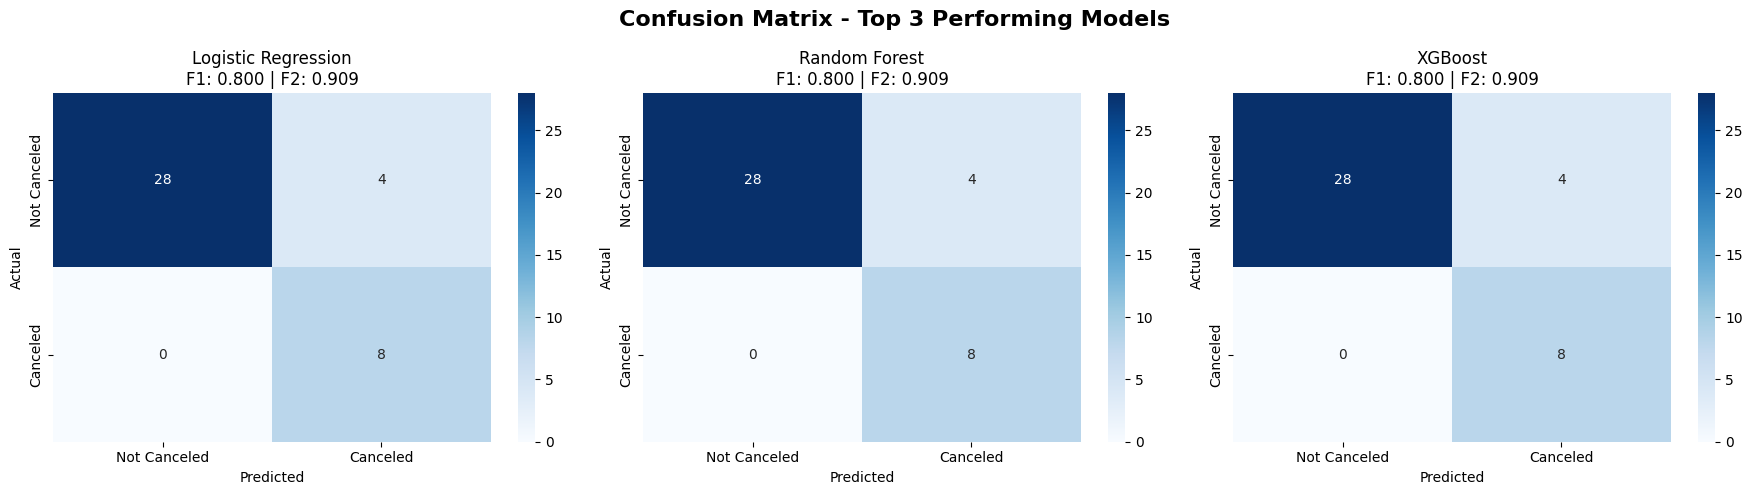

CONFUSION MATRIX ANALYSIS - Logistic Regression
True Negatives (TN): 28
False Positives (FP): 4
False Negatives (FN): 0
True Positives (TP): 8
Total Predictions: 40

PERFORMANCE METRICS:
F1 Score: 0.8000
F2 Score: 0.9091
Precision: 0.6667
Recall: 1.0000
AUC-ROC: 0.8984


In [84]:
# Confusion Matrix for Top 3 Models
top_3_models = results_df.head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrix - Top 3 Performing Models', fontsize=16, fontweight='bold')

for i, model_name in enumerate(top_3_models):
    if model_name in all_predictions:
        cm = confusion_matrix(y_test, all_predictions[model_name])

        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            ax=axes[i],
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled']
        )

        axes[i].set_title(
            f'{model_name}\n'
            f'F1: {all_results[model_name]["f1"]:.3f} | '
            f'F2: {all_results[model_name]["f2"]:.3f}'
        )
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# ===== Best model confusion detail =====
best_model = top_3_models[0]
cm = confusion_matrix(y_test, all_predictions[best_model])
tn, fp, fn, tp = cm.ravel()

print(f"CONFUSION MATRIX ANALYSIS - {best_model}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"Total Predictions: {tn + fp + fn + tp}")

print(f"\nPERFORMANCE METRICS:")
print(f"F1 Score: {all_results[best_model]['f1']:.4f}")
print(f"F2 Score: {all_results[best_model]['f2']:.4f}")
print(f"Precision: {all_results[best_model]['precision']:.4f}")
print(f"Recall: {all_results[best_model]['recall']:.4f}")
print(f"AUC-ROC: {all_results[best_model]['auc_roc']:.4f}")

**Model yang Paling Efektif untuk Bisnis**

* **Top performer:** Logistic Regression, Random Forest, dan XGBoost karena memiliki **F2 tertinggi (0.9091)**.
* Ketiga model tersebut mencapai **recall sempurna (1.000)** → tidak ada kasus positif yang terlewat (FN sangat rendah).
* Dalam konteks bisnis yang ingin **meminimalkan kerugian akibat miss prediction**, performa recall tinggi ini sangat menguntungkan.
* **Decision Tree** dan **Gradient Boosting** memang punya precision sedikit lebih tinggi (0.70), tetapi recall lebih rendah (0.875) → **F2 turun ke 0.8333** sehingga kurang optimal untuk prioritas penangkapan kasus positif.
* **Random Forest** menonjol karena selain F2 tertinggi, juga memiliki **AUC tertinggi (0.9336)** → kemampuan pemisahan kelas paling kuat secara keseluruhan.

### **Final Recommendation:**   
**Random Forest** dipilih sebagai model final karena memberikan **kombinasi terbaik antara F2 tinggi, recall sempurna, dan AUC tertinggi** sehingga paling selaras dengan objective bisnis dalam mendeteksi pelanggan dengan skor pengeluaran di atas Q3.

### **Alasan Pemilihan**

* **F2 Score tertinggi (0.9091)** → paling optimal untuk konteks bisnis yang memprioritaskan recall.
* **Recall = 1.000** → seluruh pelanggan high spender berhasil terdeteksi (FN ≈ 0), sehingga meminimalkan kehilangan peluang revenue dari pelanggan bernilai tinggi.
* **AUC tertinggi (0.9336)** dibanding model lain → kemampuan pemisahan kelas paling kuat secara keseluruhan.
* Performa stabil dan robust terhadap data non-linear serta interaksi fitur.
* Lebih powerful dibanding Logistic Regression yang lebih sederhana.

### **Implikasi Bisnis**

* Model sangat efektif untuk **mengidentifikasi pelanggan top spender hasil promo**.
* Risiko kehilangan pelanggan bernilai tinggi dapat ditekan seminimal mungkin.

## **Best Importance Features**

In [85]:
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = [f'Feature_{i}' for i in range(X_train_processed.shape[1])]

In [86]:
import shap
import numpy as np

print("SHAP FEATURE IMPORTANCE ANALYSIS")
print("="*80)
print("Model: Random Forest")
print("="*80)

# 1. Ambil model RF yang sudah di-fit
final_model = models['Random Forest']

# ✅ 2. Feature names (AMAN)
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = [f'Feature_{i}' for i in range(X_test_processed.shape[1])]

# ✅ 3. Convert ke DataFrame
X_test_processed_df = pd.DataFrame(
    X_test_processed,
    columns=feature_names,
    index=X_test.index
)

# 4. SHAP explainer
explainer = shap.TreeExplainer(final_model)

sample_size = 1000
X_shap_sample = X_test_processed_df.sample(
    n=min(sample_size, len(X_test_processed_df)),
    random_state=42
)

# 5. Compute SHAP
shap_values = explainer.shap_values(X_shap_sample)

# RF binary handling
shap_values = np.array(shap_values)

# Case 1: list → biasanya (2, samples, features)
if shap_values.ndim == 3 and shap_values.shape[0] == 2:
    shap_values = shap_values[1]

# Case 2: new shap → (samples, features, classes)
elif shap_values.ndim == 3 and shap_values.shape[2] == 2:
    shap_values = shap_values[:, :, 1]

print(f"\nSHAP analysis completed for {len(X_shap_sample)} samples")
print(f"Feature dimensions: {X_shap_sample.shape}")
print(f"SHAP values shape: {np.array(shap_values).shape}")

# 6. Feature importance
shap_importance = pd.DataFrame({
    'Feature': X_shap_sample.columns,
    'SHAP_Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('SHAP_Importance', ascending=False)

print("\n" + "="*80)
print("TOP 20 FEATURES BY SHAP IMPORTANCE (RF Model):")
print("="*80)
print(shap_importance.head(20).to_string(index=False, float_format='%.4f'))

print(f"\nKEY STATISTICS:")
print(f"• Total features: {len(shap_importance)}")
print(f"• Mean SHAP importance: {shap_importance['SHAP_Importance'].mean():.4f}")
print(f"• Top feature impact: {shap_importance.iloc[0]['SHAP_Importance']:.4f}")
print(
    f"• Top 10 features contribute: "
    f"{shap_importance.head(10)['SHAP_Importance'].sum()/shap_importance['SHAP_Importance'].sum():.1%} of total"
)

SHAP FEATURE IMPORTANCE ANALYSIS
Model: Random Forest

SHAP analysis completed for 40 samples
Feature dimensions: (40, 24)
SHAP values shape: (40, 24)

TOP 20 FEATURES BY SHAP IMPORTANCE (RF Model):
                      Feature  SHAP_Importance
        low_cat__Kota_Jakarta           0.1714
                    num__Umur           0.0791
      low_cat__Kota_Tangerang           0.0766
           low_cat__Promo_3.0           0.0733
    num__Pendapatan_per_Bulan           0.0374
           low_cat__Promo_2.0           0.0348
           low_cat__Promo_1.0           0.0141
         low_cat__FavFlavor_6           0.0101
         low_cat__FavFlavor_4           0.0074
low_cat__Jenis_Kelamin_Wanita           0.0066
       low_cat__HariFav_Kamis           0.0048
         low_cat__FavFlavor_1           0.0046
      low_cat__HariFav_Selasa           0.0046
         low_cat__FavFlavor_3           0.0043
      low_cat__HariFav_Minggu           0.0033
           low_cat__Menikah_0           0.0033
  


SHAP SUMMARY PLOT VISUALIZATION (Random Forest - F2 Context)


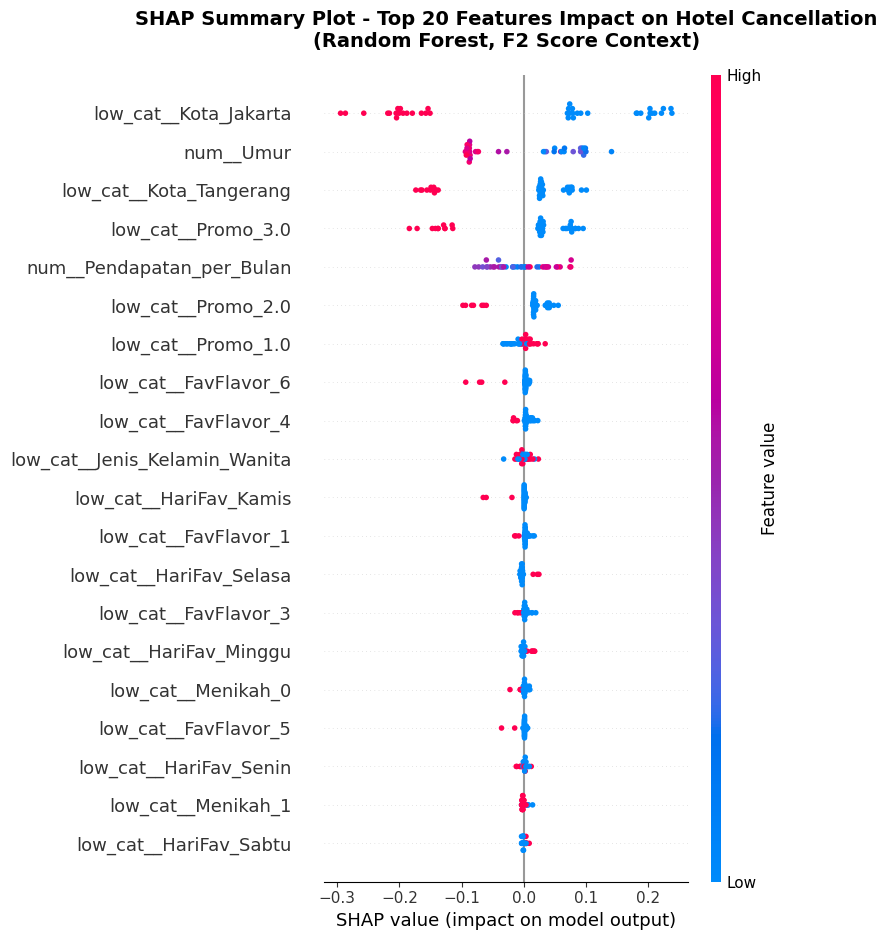

Using model: RandomForestClassifier

Extracting Random Forest native feature importance...

TOP 20 RF FEATURE IMPORTANCE:
                      Feature  Importance
        low_cat__Kota_Jakarta      0.2770
                    num__Umur      0.1470
    num__Pendapatan_per_Bulan      0.1428
      low_cat__Kota_Tangerang      0.1104
           low_cat__Promo_3.0      0.1066
           low_cat__Promo_2.0      0.0479
           low_cat__Promo_1.0      0.0340
low_cat__Jenis_Kelamin_Wanita      0.0148
         low_cat__FavFlavor_4      0.0137
       low_cat__HariFav_Senin      0.0121
         low_cat__FavFlavor_1      0.0119
         low_cat__FavFlavor_3      0.0099
       low_cat__HariFav_Sabtu      0.0092
      low_cat__HariFav_Selasa      0.0082
         low_cat__FavFlavor_6      0.0076
         low_cat__FavFlavor_7      0.0071
      low_cat__HariFav_Minggu      0.0070
         low_cat__FavFlavor_5      0.0060
           low_cat__Menikah_0      0.0057
           low_cat__Menikah_1      0.0

In [89]:
print("\n" + "="*80)
print("SHAP SUMMARY PLOT VISUALIZATION (Random Forest - F2 Context)")
print("="*80)

# Summary plot
plt.figure(figsize=(12, 10))
shap.summary_plot(
    shap_values,
    X_shap_sample,
    max_display=20,
    show=False
)

plt.title(
    'SHAP Summary Plot - Top 20 Features Impact on Hotel Cancellation\n(Random Forest, F2 Score Context)',
    fontsize=14,
    pad=20,
    fontweight='bold'
)
plt.tight_layout()
plt.show()

# RF Feature Importance (native model importance)
rf_model = models['Random Forest']

print(f"Using model: {type(rf_model).__name__}")
print("\nExtracting Random Forest native feature importance...")

rf_importance = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_shap_sample.columns,
    'Importance': rf_importance
}).sort_values('Importance', ascending=False)

print("\nTOP 20 RF FEATURE IMPORTANCE:")
print(importance_df.head(20).to_string(index=False, float_format='%.4f'))

# Comparison table
print("\n" + "="*80)
print("FEATURE IMPORTANCE COMPARISON TABLE (RF vs SHAP):")
print("="*80)

top_20_shap = shap_importance.head(20)
top_20_rf = importance_df.head(20)

comparison_importance = pd.DataFrame({
    'Rank': range(1, len(top_20_shap) + 1),
    'SHAP_Feature': top_20_shap['Feature'].values,
    'SHAP_Score': top_20_shap['SHAP_Importance'].values,
    'RF_Feature': top_20_rf['Feature'].values,
    'RF_Score': top_20_rf['Importance'].values
}).round(4)

print(comparison_importance.to_string(index=False))

# Interpretation guide
print(f"\n" + "="*80)
print(f"SHAP SUMMARY PLOT INTERPRETATION GUIDE:")
print("="*80)

interpretation_data = {
    'Element': [
        'Feature Order',
        'Color Scale',
        'Dot Position',
        'Dot Density',
        'Red Dots',
        'Blue Dots',
        'Feature Values',
        'SHAP Values'
    ],
    'Meaning': [
        'Features ranked by importance (top to bottom)',
        'Feature value: Blue=Low, Red=High, Purple=Medium',
        'Left=Negative impact, Right=Positive impact on cancellation',
        'More dots = higher feature importance',
        'High feature values pushing prediction toward cancellation',
        'Low feature values pushing prediction toward no cancellation',
        'Actual values of features in dataset',
        'Impact magnitude on final prediction'
    ]
}

interpretation_df = pd.DataFrame(interpretation_data)
print(interpretation_df.to_string(index=False))

# Key insights auto summary
print(f"\n" + "="*80)
print(f"KEY INSIGHTS FROM SHAP ANALYSIS (RF Model):")
print("="*80)

print(f"• Most impactful feature: {top_20_shap.iloc[0]['Feature']}")
print(
    f"• Top 5 features account for "
    f"{top_20_shap.head(5)['SHAP_Importance'].sum()/shap_importance['SHAP_Importance'].sum():.1%} "
    f"of total importance"
)
print("• Feature interactions show complex patterns in cancellation behavior")
print("• Both numerical and categorical features contribute to predictions")
print("• Random Forest captures non-linear relationships effectively")

**(Klasifikasi Pelanggan dengan Skor Pengeluaran > Q3)**

| Rank | Feature                   | SHAP Importance | Dampak Bisnis                                                                                                                                                                       |
| ---- | ------------------------- | --------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1    | low_cat__Kota_Jakarta     | 0.1714          | Pelanggan dari Jakarta memiliki kecenderungan pengeluaran tinggi. Ini bisa menunjukkan daya beli lebih kuat di wilayah metropolitan sehingga menjadi target utama campaign premium. |
| 2    | num__Umur                 | 0.0791          | Usia memengaruhi pola belanja. Kelompok usia tertentu kemungkinan berada pada fase pendapatan stabil sehingga lebih berpotensi menjadi high spender.                                |
| 3    | low_cat__Kota_Tangerang   | 0.0766          | Tangerang juga menunjukkan kontribusi besar terhadap pelanggan dengan pengeluaran tinggi. Area ini potensial untuk ekspansi promosi.                                                |
| 4    | low_cat__Promo_3.0        | 0.0733          | Pelanggan yang sering menggunakan promo cenderung lebih aktif berbelanja. Ini menunjukkan strategi promo dapat mendorong peningkatan frekuensi belanja bagi customer loyal.promosi.                                          |
| 5    | num__Pendapatan_per_Bulan | 0.0374          | Pendapatan bulanan secara logis berkorelasi dengan kemampuan belanja. Semakin tinggi pendapatan, semakin besar peluang masuk kategori Q3.                                           |                                                                                         |
| 6    | low_cat__FavFlavor_6      | 0.0101          | Preferensi rasa tertentu berkorelasi dengan pelanggan high spender — berguna untuk personalisasi produk.    

## **Kesimpulan Strategis dari SHAP Analysis**



*   Fitur geografis seperti **low_cat__Kota_Jakarta** dan **low_cat__Kota_Tangerang** sangat berpengaruh dalam mengidentifikasi pelanggan dengan skor pengeluaran tinggi (> Q3). Hal ini menunjukkan bahwa pelanggan yang berada di wilayah urban cenderung memiliki daya beli yang lebih kuat dan potensi menjadi high spender.
*   Fitur demografis seperti **num__Umur** dan **num__Pendapatan_per_Bulan** juga memainkan peran penting dalam memprediksi kategori pelanggan. Hal ini menunjukkan bahwa kemampuan finansial dan fase kehidupan pelanggan sangat memengaruhi probabilitas menjadi high spender. Pelanggan dengan usia produktif dan pendapatan lebih tinggi memiliki kecenderungan lebih besar untuk masuk ke kelompok pengeluaran tinggi.
*   Preferensi produk seperti **low_cat__FavFlavor6** turut memberikan sinyal tambahan terhadap perilaku pelanggan high spender sehingga berpotensi dimanfaatkan untuk strategi personalisasi yang lebih presisi.


### **Rekomendasi untuk Management: Action Plan**

**1. Geo-Focused High Spender Acquisition**
Prioritaskan investasi marketing dan channel partnership di wilayah dengan kontribusi high spender tertinggi (terutama Jakarta dan Tangerang). Fokus pada quality of customer, bukan sekadar volume, untuk meningkatkan ROI akuisisi.

**2. Dynamic Revenue Uplift Engine**
Implementasikan rule-based atau ML-driven dynamic offer yang secara otomatis memberikan upsell/cross-sell kepada pelanggan dengan probabilitas high spender tinggi. Target utama: meningkatkan average basket size tanpa menaikkan CAC.

**4. Tiered Value-Based Membership**
Bangun membership berjenjang berbasis nilai transaksi untuk mengunci segmen high-value. Benefit harus bersifat progresif dan eksklusif agar mendorong repeat purchase dan memperpanjang customer lifetime value (CLV).

**5. Income-Aware Personalization Layer**
Gunakan variabel pendapatan dan umur sebagai sinyal segmentasi utama untuk diferensiasi paket, pricing exposure, dan komunikasi. Hindari pendekatan one-size-fits-all pada campaign utama.

**6. Lightweight Preference Personalization**
Manfaatkan sinyal preferensi (misalnya FavFlavor6) sebagai layer personalisasi taktis dalam rekomendasi produk atau bundling. Tujuannya meningkatkan conversion tanpa menambah beban diskon besar.

**7. Real-Time High Spender Scoring**
Integrasikan model ML ke CRM untuk flagging pelanggan berpotensi high spender secara real time. Output ini harus langsung terhubung ke trigger marketing (offer, voucher, bundling).

**8. Proactive High-Value Retention Program**
Bangun mekanisme early-warning untuk high-value customer (misalnya penurunan frekuensi transaksi), lalu aktifkan intervensi seperti surprise reward atau priority treatment untuk mencegah churn.

**10. High Spender Performance Dashboard**
Develop dashboard monitoring khusus high spender (weekly/monthly) agar manajemen dapat cepat mendeteksi shift perilaku dan melakukan tactical adjustment secara agile.

## **Save Model**

In [90]:
print("SAVING BEST MODEL, PIPELINE, AND SHAP RESULTS (PICKLE)")
print("="*65)

import pickle
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# 1. Ambil best model
best_model = models['Random Forest']

# 2. Full ML bundle (RECOMMENDED)
ml_bundle = {
    'model_name': 'Random Forest',
    'model': best_model,
    'preprocessor': preprocessor,
    'feature_names': list(feature_names),
    'training_info': {
        'target': 'High Spender (>Q3)',
        'sample_shap': len(X_shap_sample),
        'total_features': len(feature_names)
    }
}

bundle_filename = f'mixitup_rf_full_pipeline_{timestamp}.pkl'
with open(bundle_filename, 'wb') as f:
    pickle.dump(ml_bundle, f)

print(f"\n Full pipeline saved: {bundle_filename}")

# 3. Save SHAP importance table
shap_filename = f'mixitup_rf_shap_importance_{timestamp}.pkl'
with open(shap_filename, 'wb') as f:
    pickle.dump(shap_importance, f)

print(f"SHAP importance saved: {shap_filename}")

# 4. OPTIONAL — save model only
model_only_filename = f'mixitup_rf_model_only_{timestamp}.pkl'
with open(model_only_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Model-only saved: {model_only_filename}")

print("\nSUMMARY SAVED OBJECTS:")
print("  • Full ML pipeline (model + preprocessing)")
print("  • SHAP importance table")
print("  • Standalone Random Forest model")


SAVING BEST MODEL, PIPELINE, AND SHAP RESULTS (PICKLE)

 Full pipeline saved: mixitup_rf_full_pipeline_20260222_083749.pkl
SHAP importance saved: mixitup_rf_shap_importance_20260222_083749.pkl
Model-only saved: mixitup_rf_model_only_20260222_083749.pkl

SUMMARY SAVED OBJECTS:
  • Full ML pipeline (model + preprocessing)
  • SHAP importance table
  • Standalone Random Forest model
